# Pregunta 2

## Partes a) y b)

In [174]:
# importar datos
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
data = fetch_california_housing()
print('Llaves del diccionario:\t', data.keys() ) #1era es input y 2da es output
print('Nombres de atributos:\t', data.feature_names ) # variables de entrada


# importar modelos
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

Llaves del diccionario:	 dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
Nombres de atributos:	 ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


Veamos de qué se trata la data:

In [175]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

Ordenemos un poco los datos para manejarlos con facilidad:

In [176]:
# base de atributos
X  = pd.DataFrame(data.data, columns=data.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [177]:
y = pd.Series(data.target, name=data.target_names[0]) 
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

### Regresiones

In [199]:
coefs = []
intercepts = []
for model in [LinearRegression(), Ridge(), Lasso()]:
    # Fit
    model.fit(X,y)
    print('-'*50)

    # R^2
    print(f'R^2 para {model}: \t{model.score(X,y)}')
    
    # RMSE
    y_pred = model.predict(X)
    RMSE = np.sqrt(mean_squared_error(y, y_pred))
    print(f'RMSE para {model}: \t{RMSE}')

    # Coeficientes
    coef = pd.DataFrame(model.coef_.reshape(-1,len(data.feature_names)), index=[f'{model}'[:-2]], columns=data.feature_names, )
    intercept = model.intercept_
    intercepts.append(intercept)
    print(f'Inter. de {model}: \t{intercept}')
    coefs.append(coef)

# Todos los coeficientes
coefs = pd.concat(coefs)
coefs

--------------------------------------------------
R^2 para LinearRegression(): 	0.606232685199805
RMSE para LinearRegression(): 	0.7241001216576387
Inter. de LinearRegression(): 	-36.94192020718441
--------------------------------------------------
R^2 para Ridge(): 	0.6062326586911465
RMSE para Ridge(): 	0.7241001460310718
Inter. de Ridge(): 	-36.93858523232904
--------------------------------------------------
R^2 para Lasso(): 	0.28526231449198314
RMSE para Lasso(): 	0.9755558311126926
Inter. de Lasso(): 	1.348041367341614


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
LinearRegression,0.436693,0.009436,-0.107322,0.645066,-0.000004,-0.003787,-0.421314,-0.434514
Ridge,0.436594,0.009437,-0.107133,0.644062,-0.000004,-0.003786,-0.421299,-0.434485
Lasso,0.145469,0.005815,0.000000,-0.000000,-0.000006,-0.000000,-0.000000,-0.000000


Plot de parámetros

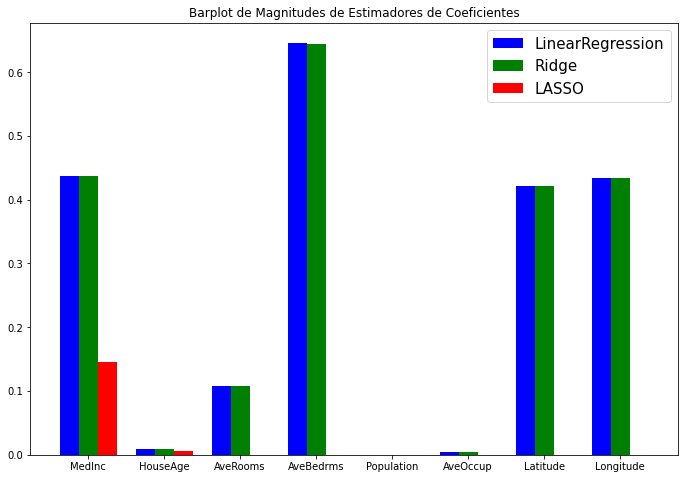

In [232]:
import matplotlib.pyplot as plt

x = np.arange(len(coefs.columns))
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.bar(x - 0.25, abs(coefs.iloc[0,]), color = 'b', width = 0.25, label='LinearRegression')
ax.bar(x + 0.00, abs(coefs.iloc[1,]), color = 'g', width = 0.25, label='Ridge')
ax.bar(x + 0.25, abs(coefs.iloc[2,]), color = 'r', width = 0.25, label='LASSO')
ax.set_xticks(x)
ax.set_xticklabels(['']+coefs.columns)
ax.set_title('Barplot de Magnitudes de Estimadores de Coeficientes')
ax.legend(prop={'size':15})
plt.show()

Interceptos

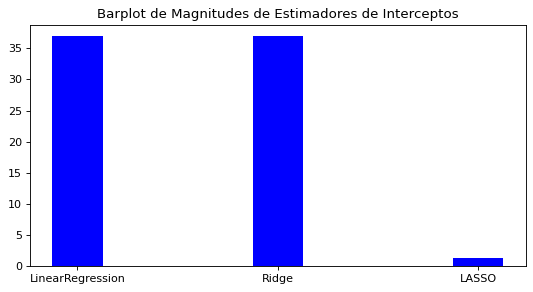

In [231]:
modelos = ['LinearRegression', 'Ridge', 'LASSO']
plt.figure(figsize=(8, 4), dpi=80)
plt.bar(x=modelos, height=abs(np.array(intercepts)), color='b', width=0.25)
plt.title('Barplot de Magnitudes de Estimadores de Interceptos')
plt.show()

## Parte c)

In [239]:
from sklearn.model_selection import train_test_split

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
9950,4.5694,28.0,6.219512,1.030488,504.0,3.073171,38.38,-122.33
3547,5.6392,18.0,5.951644,1.034816,3010.0,2.911025,34.26,-118.60
4448,1.7292,47.0,3.628032,1.032345,1452.0,3.913747,34.07,-118.21
6984,4.6226,36.0,5.126238,0.985149,988.0,2.445545,33.96,-118.02
4432,2.4375,49.0,4.024390,0.942073,1405.0,4.283537,34.08,-118.20


Regresiones

In [241]:
coefs2 = []
intercepts2 = []

for model in [LinearRegression(), Ridge(), Lasso()]:
    # Fit
    model.fit(X,y)
    print('-'*50)

    # R^2
    print(f'R^2 para {model}: \t{model.score(X_train,y_train)}')
    
    # RMSE
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'RMSE para {model}: \t{RMSE}')

    # Coeficientes
    coef = pd.DataFrame(model.coef_.reshape(-1,len(data.feature_names)), index=[f'{model}'[:-2]], columns=data.feature_names, )
    intercept = model.intercept_
    intercepts2.append(intercept)
    print(f'Inter. de {model}: \t{intercept}')
    coefs2.append(coef)

# Todos los coeficientes
coefs2 = pd.concat(coefs2)
coefs2

--------------------------------------------------
R^2 para LinearRegression(): 	0.6049643483797418
RMSE para LinearRegression(): 	0.7189504852574808
Inter. de LinearRegression(): 	-36.94192020718441
--------------------------------------------------
R^2 para Ridge(): 	0.6049645136834669
RMSE para Ridge(): 	0.7189512205036622
Inter. de Ridge(): 	-36.93858523232904
--------------------------------------------------
R^2 para Lasso(): 	0.2849808342825434
RMSE para Lasso(): 	0.974159540249217
Inter. de Lasso(): 	1.348041367341614


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
LinearRegression,0.436693,0.009436,-0.107322,0.645066,-0.000004,-0.003787,-0.421314,-0.434514
Ridge,0.436594,0.009437,-0.107133,0.644062,-0.000004,-0.003786,-0.421299,-0.434485
Lasso,0.145469,0.005815,0.000000,-0.000000,-0.000006,-0.000000,-0.000000,-0.000000


Plot de parámetros

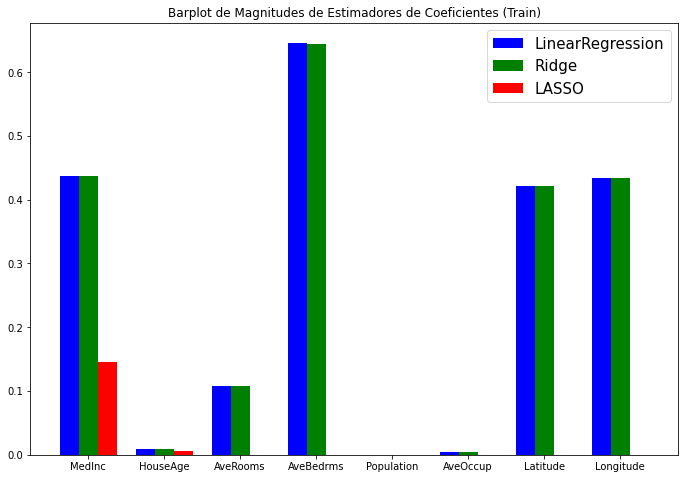

In [246]:
x = np.arange(len(coefs.columns))
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.bar(x - 0.25, abs(coefs2.iloc[0,]), color = 'b', width = 0.25, label='LinearRegression')
ax.bar(x + 0.00, abs(coefs2.iloc[1,]), color = 'g', width = 0.25, label='Ridge')
ax.bar(x + 0.25, abs(coefs2.iloc[2,]), color = 'r', width = 0.25, label='LASSO')
ax.set_xticks(x)
ax.set_xticklabels(['']+coefs2.columns)
ax.set_title('Barplot de Magnitudes de Estimadores de Coeficientes (Train)')
ax.legend(prop={'size':15})
plt.show()

Interceptos

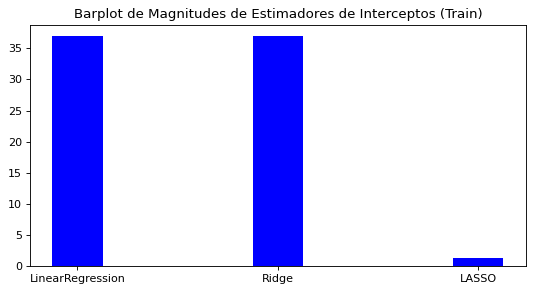

In [248]:
modelos = ['LinearRegression', 'Ridge', 'LASSO']
plt.figure(figsize=(8, 4), dpi=80)
plt.bar(x=modelos, height=abs(np.array(intercepts2)), color='b', width=0.25)
plt.title('Barplot de Magnitudes de Estimadores de Interceptos (Train)')
plt.show()

## Parte d) (BONUS)